Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=adam, lr=0.001
Epoch 50/50, Loss: 0.0016, RMSE: 0.0331
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=adam, lr=0.01
Epoch 50/50, Loss: 0.0015, RMSE: 0.0281
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=adam, lr=0.05
Epoch 50/50, Loss: 0.0015, RMSE: 0.0506
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=sgd, lr=0.001
Epoch 50/50, Loss: 0.1473, RMSE: 0.6963
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=sgd, lr=0.01
Epoch 50/50, Loss: 0.0419, RMSE: 0.3275
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=sgd, lr=0.05
Epoch 50/50, Loss: 0.0081, RMSE: 0.0782
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=rmsprop, lr=0.001
Epoch 50/50, Loss: 0.0017, RMSE: 0.0344
Training with hidden_dim=32, num_layers=1, batch_size=16, optimizer=rmsprop, lr=0.01
Epoch 50/50, Loss: 0.0018, RMSE: 0.0406
Training with hidd

Epoch 50/50, Loss: 0.1325, RMSE: 0.6750
Training with hidden_dim=64, num_layers=1, batch_size=32, optimizer=sgd, lr=0.01
Epoch 50/50, Loss: 0.0389, RMSE: 0.3064
Training with hidden_dim=64, num_layers=1, batch_size=32, optimizer=sgd, lr=0.05
Epoch 50/50, Loss: 0.0090, RMSE: 0.0689
Training with hidden_dim=64, num_layers=1, batch_size=32, optimizer=rmsprop, lr=0.001
Epoch 50/50, Loss: 0.0015, RMSE: 0.0352
Training with hidden_dim=64, num_layers=1, batch_size=32, optimizer=rmsprop, lr=0.01
Epoch 50/50, Loss: 0.0015, RMSE: 0.0731
Training with hidden_dim=64, num_layers=1, batch_size=32, optimizer=rmsprop, lr=0.05
Epoch 50/50, Loss: 0.0048, RMSE: 0.1008
Training with hidden_dim=64, num_layers=1, batch_size=64, optimizer=adam, lr=0.001
Epoch 50/50, Loss: 0.0016, RMSE: 0.0335
Training with hidden_dim=64, num_layers=1, batch_size=64, optimizer=adam, lr=0.01
Epoch 50/50, Loss: 0.0014, RMSE: 0.0310
Training with hidden_dim=64, num_layers=1, batch_size=64, optimizer=adam, lr=0.05
Epoch 50/50, Lo

Epoch 50/50, Loss: 0.0019, RMSE: 0.0424
Training with hidden_dim=128, num_layers=1, batch_size=64, optimizer=rmsprop, lr=0.05
Epoch 50/50, Loss: 3.1708, RMSE: 1.6351
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=adam, lr=0.001
Epoch 50/50, Loss: 0.0016, RMSE: 0.0379
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=adam, lr=0.01
Epoch 50/50, Loss: 0.0015, RMSE: 0.0419
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=adam, lr=0.05
Epoch 50/50, Loss: 0.0018, RMSE: 0.0535
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=sgd, lr=0.001
Epoch 50/50, Loss: 0.1229, RMSE: 0.6642
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=sgd, lr=0.01
Epoch 50/50, Loss: 0.0547, RMSE: 0.3976
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=sgd, lr=0.05
Epoch 50/50, Loss: 0.0115, RMSE: 0.0688
Training with hidden_dim=128, num_layers=2, batch_size=16, optimizer=rmsprop, lr=0.001
Epoch 50/5

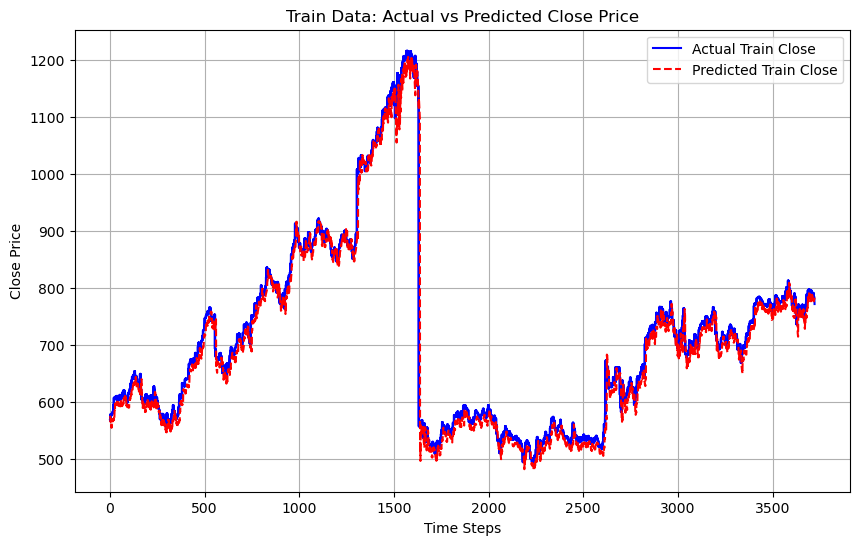

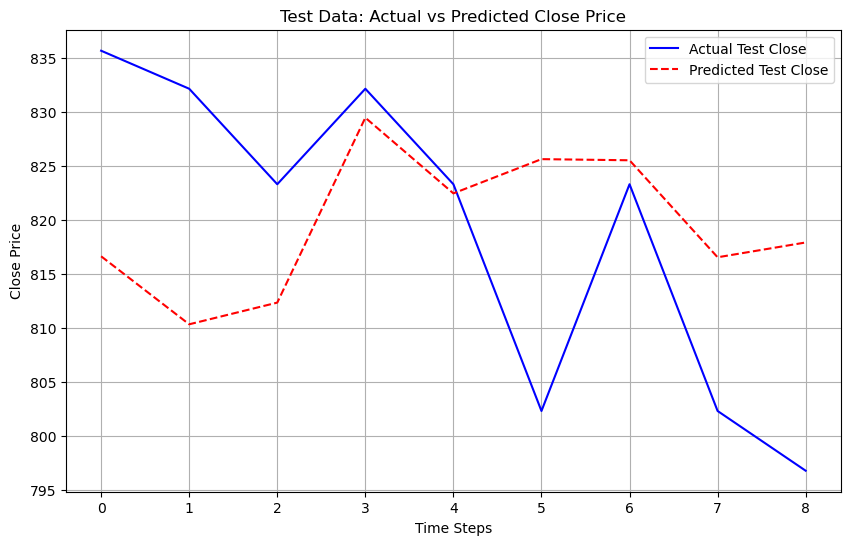

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_test = pd.read_csv("Google_Stock_Price_Test.csv")

features = ['Open', 'High', 'Low', 'Close', 'Volume']
for feature in features:
    data_train[feature] = data_train[feature].replace({',': ''}, regex=True).astype(float)
    data_test[feature] = data_test[feature].replace({',': ''}, regex=True).astype(float)

data_train['Date'] = pd.to_datetime(data_train['Date'], format='%m/%d/%Y')
data_test['Date'] = pd.to_datetime(data_test['Date'], format='%m/%d/%Y')

scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train[features])
data_test_scaled = scaler.transform(data_test[features])

def generate_sequences(data, history, forecast):
    X, y = [], []
    for i in range(history, len(data) - forecast + 1):
        X.append(data[i - history:i])
        y.append(data[i:i + forecast])
    return np.array(X), np.array(y)

history_length = 15
forecast_length = 3

X_train, y_train = generate_sequences(data_train_scaled, history_length, forecast_length)
X_test, y_test = generate_sequences(data_test_scaled, history_length, forecast_length)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, layers, model_type='LSTM'):
        super(PricePredictor, self).__init__()
        self.hidden_size = hidden_size
        self.layers = layers

        if model_type == 'LSTM':
            self.rnn = nn.LSTM(input_size, hidden_size, layers, batch_first=True)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(input_size, hidden_size, layers, batch_first=True)
        else:
            self.rnn = nn.RNN(input_size, hidden_size, layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.rnn(x) if isinstance(self.rnn, nn.LSTM) else self.rnn(x)
        hidden = hidden[-1]
        return self.fc(hidden)

hidden_sizes = [32, 64, 128]
layer_counts = [1, 2]
batch_sizes = [16, 32, 64]
optimizers = ['adam', 'sgd', 'rmsprop']
learning_rates = [0.001, 0.01, 0.05]

best_rmse = float('inf')
best_model_params = None
best_model_state = None

for hidden_size, layer_count, batch_size, opt_name, lr in product(hidden_sizes, layer_counts, batch_sizes, optimizers, learning_rates):
    print(f"Training with hidden_size={hidden_size}, layer_count={layer_count}, batch_size={batch_size}, optimizer={opt_name}, lr={lr}")

    model = PricePredictor(input_size=X_train.shape[2], hidden_size=hidden_size, output_size=forecast_length * 5, layers=layer_count, model_type='LSTM')

    optimizer = {
        'adam': torch.optim.Adam,
        'sgd': torch.optim.SGD,
        'rmsprop': torch.optim.RMSprop
    }[opt_name](model.parameters(), lr=lr)

    criterion = nn.MSELoss()

    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch).view(-1, forecast_length, 5)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        model.eval()
        test_preds, test_targets = [], []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                preds = model(X_batch).view(-1, forecast_length, 5)
                test_preds.append(preds)
                test_targets.append(y_batch)
        test_preds = torch.cat(test_preds, dim=0).numpy()
        test_targets = torch.cat(test_targets, dim=0).numpy()

        rmse = np.sqrt(mean_squared_error(test_targets.reshape(-1, 5), test_preds.reshape(-1, 5)))

    if rmse < best_rmse:
        best_rmse = rmse
        best_model_state = model.state_dict()
        best_model_params = (hidden_size, layer_count, batch_size, lr, opt_name)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, RMSE: {rmse:.4f}")

print(f"Best model found with RMSE: {best_rmse:.4f}")
hidden_size, layer_count, batch_size, lr, opt_name = best_model_params
model = PricePredictor(input_size=X_train.shape[2], hidden_size=hidden_size, output_size=forecast_length * 5, layers=layer_count, model_type='LSTM')
model.load_state_dict(best_model_state)

def get_predictions(model, data):
    model.eval()
    with torch.no_grad():
        predictions = model(data).view(-1, forecast_length, 5).numpy()
    return predictions

train_preds = get_predictions(model, X_train)
test_preds = get_predictions(model, X_test)

train_preds_rescaled = scaler.inverse_transform(train_preds.reshape(-1, 5))
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 5))
test_preds_rescaled = scaler.inverse_transform(test_preds.reshape(-1, 5))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 5))

plt.figure(figsize=(10, 6))
plt.plot(y_train_rescaled[:, 3], label='Actual Train Close', color='blue')
plt.plot(train_preds_rescaled[:, 3], label='Predicted Train Close', color='red', linestyle='--')
plt.title('Train Data: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:, 3], label='Actual Test Close', color='blue')
plt.plot(test_preds_rescaled[:, 3], label='Predicted Test Close', color='red', linestyle='--')
plt.title('Test Data: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [2]:
import matplotlib.pyplot as plt

# Train Data Plot
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_train_rescaled)), y_train_rescaled, label='Actual Train Data', color='blue')
plt.plot(range(len(train_predictions_rescaled)), train_predictions_rescaled, label='Train Predictions', color='orange')
plt.title('Train Data and Predictions')
plt.legend()

# Save the train data plot in the current directory
train_plot_path = 'train_data_predictions.png'  # File will be saved in the current directory
plt.savefig(train_plot_path, dpi=300, bbox_inches='tight')  # Save as high-resolution image
plt.close()  # Close the figure

print(f"Train plot saved in the current directory as {train_plot_path}")

# Test Data Plot
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Actual Test Data', color='blue')
plt.plot(range(len(test_predictions_rescaled)), test_predictions_rescaled, label='Test Predictions', color='orange')
plt.title('Test Data and Predictions')
plt.legend()

# Save the test data plot in the current directory
test_plot_path = 'test_data_predictions.png'  # File will be saved in the current directory
plt.savefig(test_plot_path, dpi=300, bbox_inches='tight')  # Save as high-resolution image
plt.close()  # Close the figure

print(f"Test plot saved in the current directory as {test_plot_path}")


Train plot saved in the current directory as train_data_predictions.png
Test plot saved in the current directory as test_data_predictions.png


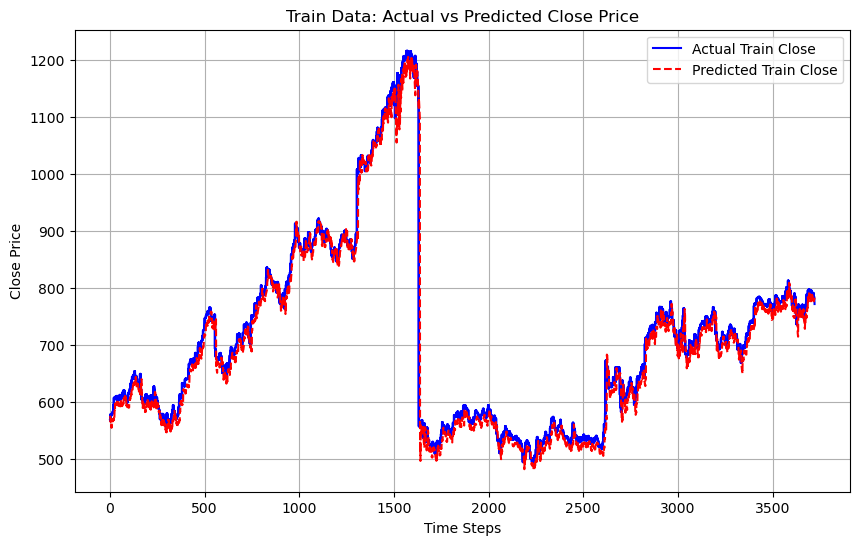

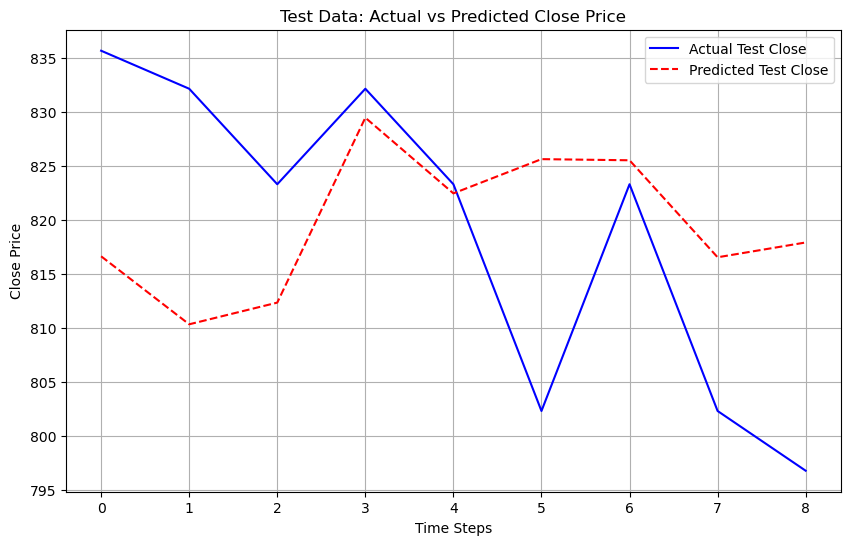

In [3]:
import matplotlib.pyplot as plt


# Plot predictions for train data
plt.figure(figsize=(10, 6))
plt.plot(y_train_rescaled[:, 3], label='Actual Train Close', color='blue')
plt.plot(train_predictions_rescaled[:, 3], label='Predicted Train Close', color='red', linestyle='--')
plt.title('Train Data: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.savefig('train_actual_vs_predicted.png')  # Save the train graph
plt.show()

# Plot predictions for test data
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:, 3], label='Actual Test Close', color='blue')
plt.plot(test_predictions_rescaled[:, 3], label='Predicted Test Close', color='red', linestyle='--')
plt.title('Test Data: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.savefig('test_actual_vs_predicted.png')  # Save the test graph
plt.show()
